In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Elevate Labs/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### **Preprocessing**

In [4]:
# List of categorical columns
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea', 'furnishingstatus']

# Encoding categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Checking the new columns
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


### **Train-Test Split**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Splitting into features and target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# 80-20 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Model Training (Simple Linear Regression on 'area')**

In [6]:
# Simple Linear Regression using 'area' only
X_train_area = X_train[['area']]
X_test_area = X_test[['area']]

# Model
simple_model = LinearRegression()
simple_model.fit(X_train_area, y_train)

# Predictions
y_pred_area = simple_model.predict(X_test_area)

### **Model Evaluation (Simple)**

In [7]:
# Metrics for Simple Linear Regression
mae_simple = mean_absolute_error(y_test, y_pred_area)
mse_simple = mean_squared_error(y_test, y_pred_area)
r2_simple = r2_score(y_test, y_pred_area)

print(f"Simple Linear Regression - MAE: {mae_simple}")
print(f"Simple Linear Regression - MSE: {mse_simple}")
print(f"Simple Linear Regression - R²: {r2_simple}")

Simple Linear Regression - MAE: 1474748.1337969352
Simple Linear Regression - MSE: 3675286604768.185
Simple Linear Regression - R²: 0.27287851871974644


### **Plotting the Regression Line**

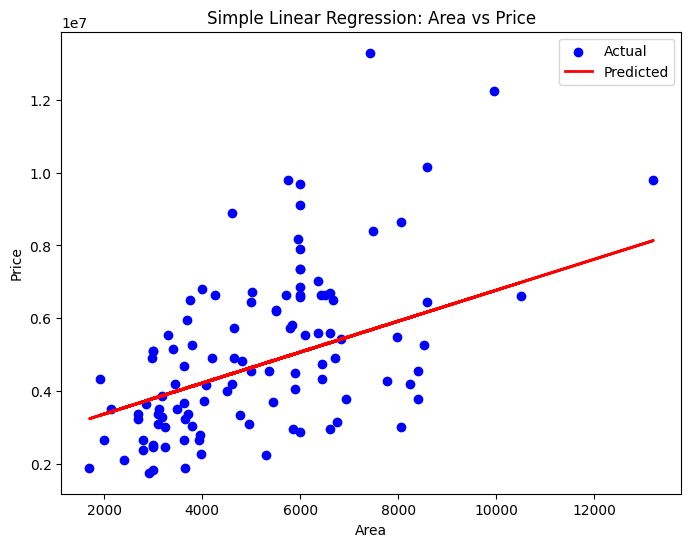

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
plt.scatter(X_test_area, y_test, color='blue', label='Actual')
plt.plot(X_test_area, y_pred_area, color='red', linewidth=2, label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Area vs Price')
plt.legend()
plt.show()

### **Model Training (Multiple Linear Regression)**

In [9]:
# Multiple Linear Regression using all features
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Predictions
y_pred_multi = multi_model.predict(X_test)

### **Model Evaluation (Multiple)**

In [10]:
# Metrics for Multiple Linear Regression
mae_multi = mean_absolute_error(y_test, y_pred_multi)
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print(f"Multiple Linear Regression - MAE: {mae_multi}")
print(f"Multiple Linear Regression - MSE: {mse_multi}")
print(f"Multiple Linear Regression - R²: {r2_multi}")

Multiple Linear Regression - MAE: 970043.4039201636
Multiple Linear Regression - MSE: 1754318687330.6638
Multiple Linear Regression - R²: 0.6529242642153184


### **Coefficients Interpretation**

In [11]:
# Coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': multi_model.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))

                            Feature   Coefficient
2                         bathrooms  1.094445e+06
9               airconditioning_yes  7.914267e+05
8               hotwaterheating_yes  6.846499e+05
10                     prefarea_yes  6.298906e+05
3                           stories  4.074766e+05
7                      basement_yes  3.902512e+05
5                      mainroad_yes  3.679199e+05
6                     guestroom_yes  2.316100e+05
4                           parking  2.248419e+05
1                          bedrooms  7.677870e+04
0                              area  2.359688e+02
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05
